<a href="https://colab.research.google.com/github/manoj198508/MachineLearningCode/blob/main/Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel PCA

In this notebook, we are going to show the application of Kernel PCA when preprocessing the data for a supervised learning model.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [10]:
rand_state= 1000

In [11]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Let's work with age and Estimated salary from the feature space.

In [12]:
df= df[['Age','EstimatedSalary','Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


###  Logistic regressions  (number of features = 2 for visualization purpose)

Let's work with age and Estimated salary from the feature space.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
y = df['Purchased']
X = df.drop('Purchased', axis=1, inplace=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test) # to avoid data leakage we only transform the test set and not fit it.

In [15]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = rand_state)
logistic.fit(X_train, y_train)

# Predicting the Test set results
y_pred_test = logistic.predict(X_test)

### Applying Kernel PCA

In [16]:
df.shape

(400, 3)

In [17]:
X_train.shape

(320, 2)

In [18]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components =2, kernel = 'rbf') # 'rbf', 'sigmoid', 'poly', 'linear'
train_pca_scores= kpca.fit_transform(X_train)
test_pca_scores=  kpca.transform(X_test)

In [19]:
train_pca_scores.shape

(320, 2)

we can find the PVE as below:

In [20]:
var = np.var(KernelPCA(n_components =2, kernel = 'rbf').fit_transform(X), axis=0) # 'rbf', 'sigmoid', 'poly', 'linear'
var

array([0.0109865 , 0.00908386])

In [21]:
PVE = (var / var.sum())
PVE

array([0.54739926, 0.45260074])

In [22]:
#cumulative PVE
CPVE = PVE.cumsum()
CPVE

array([0.54739926, 1.        ])

In [23]:
# Fitting Logistic Regression to the Training set
logistic.fit(train_pca_scores, y_train)

# Predicting the Test set results
y_PC_pred_test = logistic.predict(test_pca_scores)

### the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        48
           1       0.87      0.62      0.73        32

    accuracy                           0.81        80
   macro avg       0.83      0.78      0.79        80
weighted avg       0.82      0.81      0.81        80



In [26]:
print(classification_report(y_test, y_PC_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.79      0.69      0.73        32

    accuracy                           0.80        80
   macro avg       0.80      0.78      0.79        80
weighted avg       0.80      0.80      0.80        80



### Let's see the classifiers in two cases:
1. Original space + logistic regression (Linear Classifier)
2. Kernel PC space + logistic regression (Linear classifier)



### 1. Original space + logistic regression (Linear Classifier)

In [27]:
logistic = LogisticRegression(random_state = rand_state)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=1000)

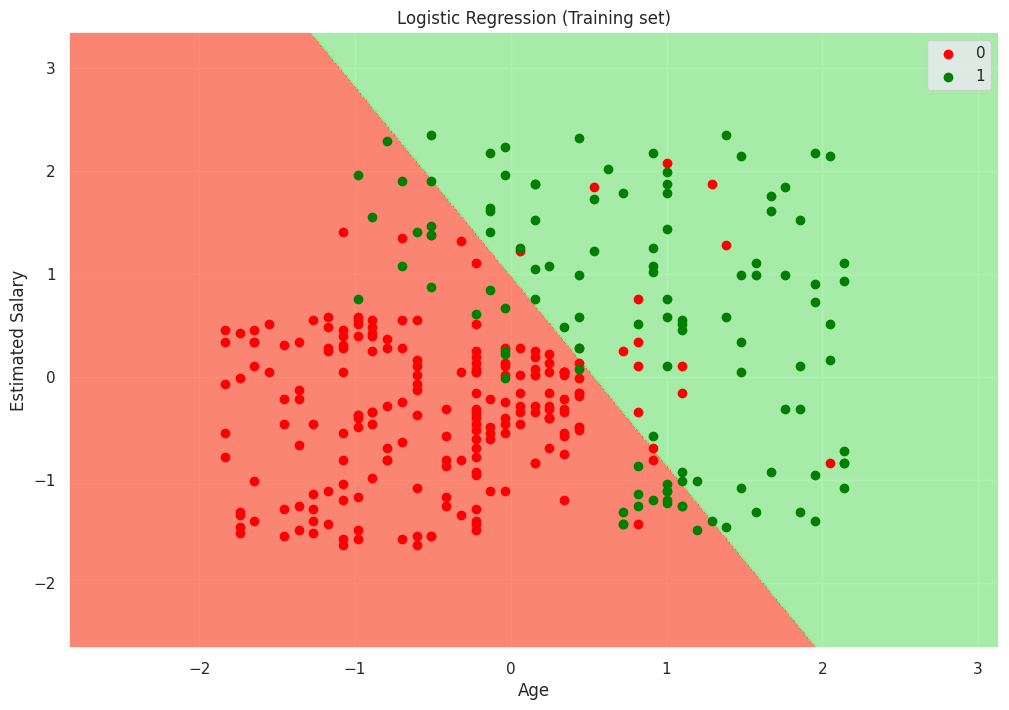

In [28]:
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### 2. Kernel PC space + logistic regression (Linear classifier)


In [29]:
kernel_logistic = LogisticRegression(random_state = rand_state)
kernel_logistic.fit(train_pca_scores, y_train)

LogisticRegression(random_state=1000)

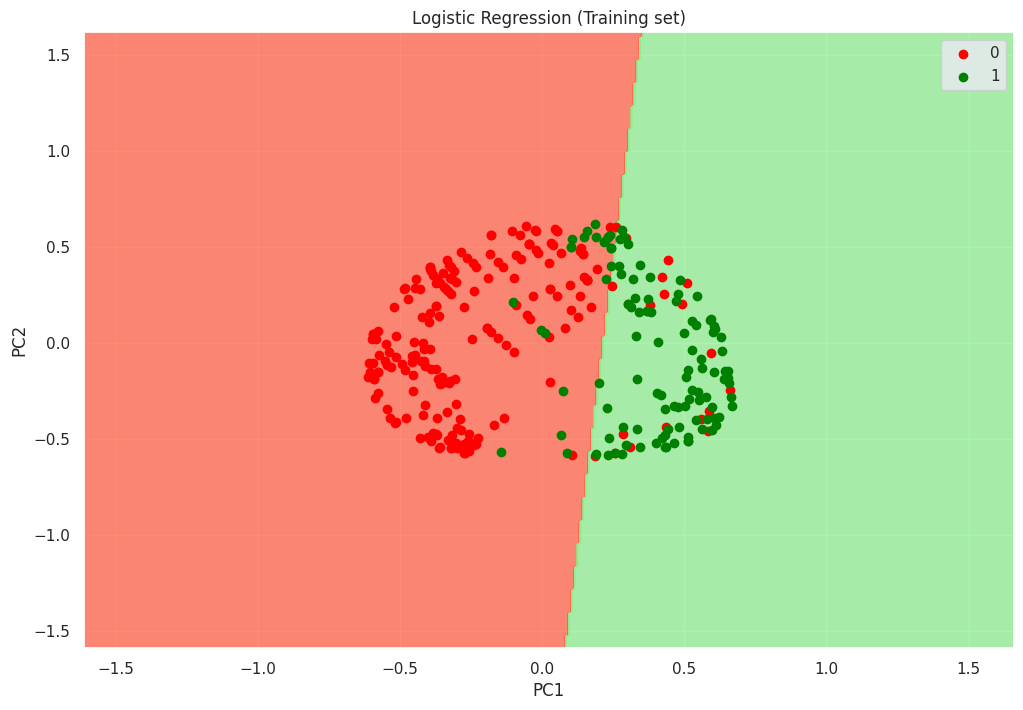

In [30]:
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = train_pca_scores, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, kernel_logistic.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Here, the kernel PCA is finding the most important components of the Gram matrix (400*400) which carry some information about non-linearity of the data.

### Let's see the performance of the models in the test set! this is what matters.


In [31]:
print(classification_report(y_test, logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        48
           1       0.87      0.62      0.73        32

    accuracy                           0.81        80
   macro avg       0.83      0.78      0.79        80
weighted avg       0.82      0.81      0.81        80



In [32]:
print(classification_report(y_test, kernel_logistic.predict(test_pca_scores)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.79      0.69      0.73        32

    accuracy                           0.80        80
   macro avg       0.80      0.78      0.79        80
weighted avg       0.80      0.80      0.80        80



**Exercise**:
1. Go back and use linear kernel. what do you expect?
2. Try poly or sigmoid kernels as well. Any improvements?

###  Additional links:
1. PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. PCA visualization: https://setosa.io/ev/principal-component-analysis/
3. Kernel PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
4. Kernel PCA visualization: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
5. What is Singular Value Decomposition (SVD): https://www.youtube.com/watch?v=mBcLRGuAFUk